In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
df = pd.read_csv("C:\\Users\\reauter\\Documents\\Data_Binning.csv")
#df.columns = ["Full_Code","Name", "Code","L.Trade", "Bid Vol","Bid","Ask","Ask Vol","Volume","High","Low","P.Close","+/- %"]
df.drop(df.columns[0:2], axis=1, inplace=True)
df.drop(df.columns[6:212], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume,Close-Open
0,35571.20,35612.00,35543.50,35562.00,52975,0.00
1,35562.00,35589.00,35539.70,35551.60,56575,-4.10
2,35555.70,35623.45,35545.05,35595.00,71075,-8.00
3,35603.00,35675.00,35570.00,35600.00,113375,-3.55
4,35603.55,35627.60,35570.40,35610.00,51825,3.90
...,...,...,...,...,...,...
272,32635.00,32694.45,32615.10,32646.75,89825,-8.25
273,32655.00,32792.85,32633.00,32706.90,124325,4.90
274,32702.00,32758.05,32660.00,32723.95,61300,-4.35
275,32728.30,32771.00,32676.95,32715.00,71275,-0.05


In [85]:
#Regression – Estimating the relationships between variables by optimizing the reduction of error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [86]:
df.describe()

,Open,High,Low,Close,Volume,Close-Open
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,34438.214621,34486.027076,34386.472924,34432.070397,137580.234657,122.271661
std,982.566028,979.898829,986.968375,985.404301,102101.447156,1963.419920
min,32396.800000,32589.000000,32335.000000,32413.650000,0.000000,-300.250000
25%,33427.700000,33464.000000,33377.000000,33422.600000,71275.000000,-2.900000
50%,34822.700000,34877.800000,34793.000000,34838.600000,111950.000000,0.650000
75%,35298.550000,35369.100000,35260.000000,35308.650000,178375.000000,3.900000
max,36000.250000,36333.000000,35865.000000,35912.200000,713875.000000,32667.700000


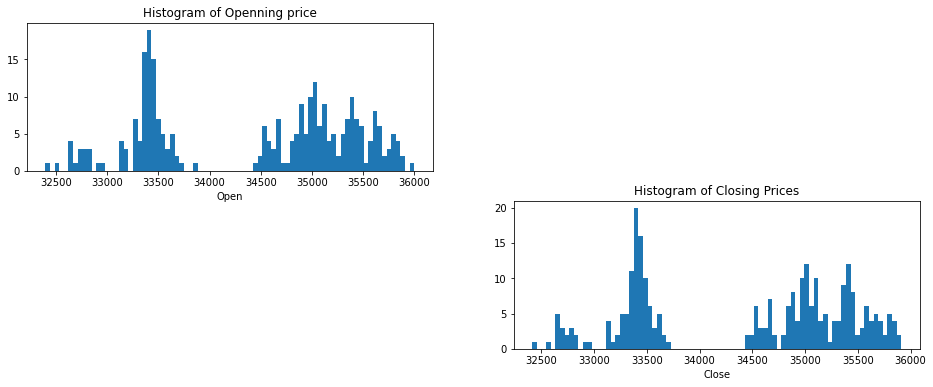

In [87]:
'''
Quick takeaways: We are working with a data set that contains 277 observations,
mean Opening price is approximately Rs.34438, median price is approximately Rs.34822
'''
'''
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right
'''

fig = plt.figure(figsize=(16, 6))
open = fig.add_subplot(221)
close = fig.add_subplot(224)

open.hist(df.Open, bins=80)
open.set_xlabel('Open')
open.set_title("Histogram of Openning price")

close.hist(df.Close, bins=80)
close.set_xlabel('Close')
close.set_title("Histogram of Closing Prices")

plt.show()


In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [89]:
'''
When you code to produce a linear regression summary with OLS with only two variables this will be the formula that you use:
The “Ordinary Least Squares” module will be doing the bulk of the work when it comes to crunching numbers for regression in Python.
'''
m = ols('Close ~ Open',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.521e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):          5.88e-319
Time:                        14:29:10   Log-Likelihood:                -1566.9
No. Observations:                 277   AIC:                             3138.
Df Residuals:                     275   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.9242    146.687     -0.136      0.8

In [90]:
m = ols('Close ~ Open + High + Low ',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.399e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:29:10   Log-Likelihood:                -1340.6
No. Observations:                 277   AIC:                             2689.
Df Residuals:                     273   BIC:                             2704.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9426     65.860      0.075      0.9

In [91]:
'''
An example of multivariate linear regression.

In our multivariate regression output above, we learn that by using additional independent variables,
such as the number of High, we can provide a model that fits the data better, 
as the R-squared for this regression has increased to 0.999. 
This means that we went from being able to explain about 99.5% of the variation in the model to 99.9% 
with the addition of a few more independent variables. 
'''

'\nAn example of multivariate linear regression.\n\nIn our multivariate regression output above, we learn that by using additional independent variables,\nsuch as the number of High, we can provide a model that fits the data better, \nas the R-squared for this regression has increased to 0.999. \nThis means that we went from being able to explain about 99.5% of the variation in the model to 99.9% \nwith the addition of a few more independent variables. \n'

C:\Users\reauter\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


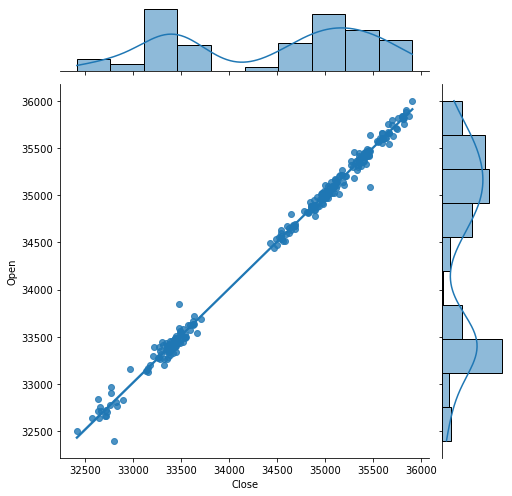

In [92]:
sns.jointplot(x="Close", y="Open", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()


Text(0, 0.5, 'High')

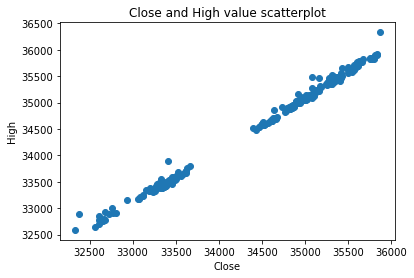

In [98]:
#a k-means cluster model
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline
plt.scatter(df.Low, df.High)
plt.title('Close and High value scatterplot')
plt.xlabel('Close')
plt.ylabel('High')

In [99]:
#Step two: Building the cluster model


In [100]:
#df.drop(df.columns[0:2], axis=1, inplace=True)


In [101]:
faith = np.array(df)

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\reauter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


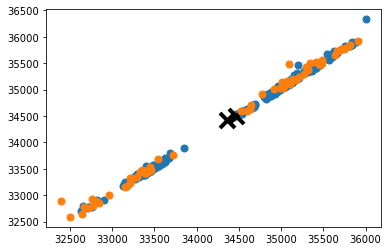

In [104]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()